## Discretising Laplace's equation to numerically solve for the fluid flow past a rotating cylinder

Krish Nigam, <em>Imperial College London</em>: This is the code for a first year undergraduate research project, supervised by Dr Sam Brzezicki. The final project poster can be accessed [<u>here</u>](https://github.com/KN7811/Discretisation-of-Laplace-equation-for-fluid-flow/blob/main/Fluid%20Flow%20Poster%20Project.pdf).

In [286]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

### Analytical Solution

We begin by considering the analytical solutions for <b>inviscid</b>, <b>incompressible</b> and <b>irrotational</b> flow past a cylinder and rotating cylinder.

We will do this by introducing a <em>complex potential</em> $w(z) = \phi + i\psi$, where $\phi$ and $\psi$ satisfy <em>Laplace's equation</em>.

For a (potentially rotating) cylinder of radius $a$, centre $(0,0)$, its complex potential is given by $w(z) = V_{\infty}\left(z+\frac{a^2}{z}\right) + \frac{\Gamma}{2\pi}\log z$, where $\Gamma\in\mathbb{R}$ is the constant modelling the rotation (<em>i.e.</em> $\Gamma=0$ models just the cylinder with no rotation).

We want to plot the velocity field $\mathbf{u}=\begin{pmatrix}u\\v\end{pmatrix}$ where $\frac{\mathrm{d}w}{\mathrm{d}z}=u-iv$.

(-2.0, 2.0, -2.0, 2.0)

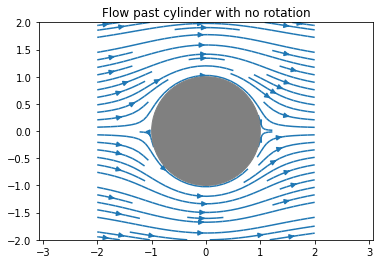

In [287]:
#Analytical plot of the flow past a cylinder

V_inf = 1 #strength of far field flow (real number - magnitude)
z_0 = 0 #centre of the cylinder (complex number position in plane)
a = 1 #radius of the cylinder (real number)
alpha = 0 #angle of the far field flow (real number - angle in radians)

def complex_potential_cylinder_w(z):
    w = (V_inf*(
        (cmath.exp(-alpha*1j))*(z-z_0)+
        ((a**2)/((cmath.exp(-alpha*1j))*(z-z_0)))
        )
        +(gamma)/(2*math.pi*1j)*cmath.log(z-z_0))
    return w

def cylinder_deriv_w(x,y,gamma):
    dwdz = (V_inf)*(cmath.exp(-alpha*1j))-(((V_inf)*(a**2)*(cmath.exp(alpha*1j)))/(((x+1j*y)-z_0)**2))+(gamma)/(2*math.pi*1j*(x+1j*y))
    return dwdz

#plot the grid/axis
x_vals = np.linspace(-2,2,100) 
y_vals = np.linspace(-2,2,100)
x_mesh, y_mesh = np.meshgrid(x_vals,y_vals)

plt.title("Flow past cylinder with no rotation")
plt.streamplot(x_mesh,y_mesh,cylinder_deriv_w(x_mesh,y_mesh,0).real,(-1)*cylinder_deriv_w(x_mesh,y_mesh,0).imag, linewidth=1.5)

circle1 = plt.Circle((0,0),1,color = 'grey',zorder=2) 
plt.gca().add_patch(circle1)
plt.axis('equal')

(-2.0, 2.0, -2.0, 2.0)

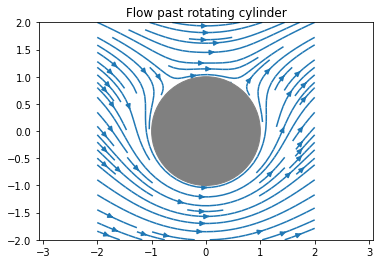

In [288]:
plt.title("Flow past rotating cylinder")
plt.streamplot(x_mesh,y_mesh,cylinder_deriv_w(x_mesh,y_mesh,10).real,(-1)*cylinder_deriv_w(x_mesh,y_mesh,10).imag, linewidth=1.5) 

circle1 = plt.Circle((0,0),1,color = 'grey',zorder=2) 
plt.gca().add_patch(circle1)
plt.axis('equal') #equal scale axis

### Discretisation of the problem

We now move on to the discrete case, where we consider the discrete case of Laplace's equation using <em>finite differences</em>. We will begin with the case of no obstacles in our region, and we'll add our cylinder in afterwards.

Laplace's equation can be used to model a variety of scenarios aside from fluid flow from temperature distribution to voltage distribution, as we will see.

Throughout, we will consider the region as being square with orign at the centre and consider the values of a so-called 'phi' ($\phi$) function at discrete integer grid points.

In [289]:
#Generate the grid with centre
x = 3 #set the dimension of the region
l = 2*x

x_vals = np.arange(-1*x,x+1)
y_vals = np.arange(-1*x,x+1)
x_mesh, y_mesh = np.meshgrid(x_vals, y_vals)

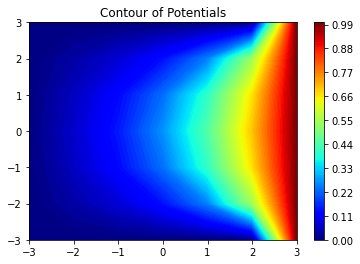

In [290]:
#define vector of potentials
phi = np.empty((l+1,l+1))
#fill grid with an initial 'guess' value
phi.fill(0.5)

#set boundary conditions
phi[(l):, :] = 0 #top
phi[:1, :] = 0 #bottom
phi[:, (l):] = 1 #right
phi[:, :1] = 0 #left

##apply iterative averaging algorithm by comparing each point to the four points around it
#for i in range(0, 50):
#    for j in range(1, l):
#        for k in range(1, l):
#            phi[j, k] = (phi[j-1][k] + phi[j+1][k] + phi[j][k-1] + phi[j][k+1])/4
            
#apply iterative averaging algorithm by comparing each point to the eight points around it
for i in range(0, 10):
    for j in range(1, l):
        for k in range(1, l):
            phi[j, k] = (phi[j-1][k] + phi[j+1][k] + phi[j][k-1] + phi[j][k+1]
                         +phi[j-1][k-1]+phi[j-1][k+1]+phi[j+1][k-1]+phi[j+1][k+1])/8
            
# Plot contour
plt.title("Contour of Potentials")
plt.contourf(x_mesh, y_mesh, phi.real, 100, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

We now add an obstacle in the middle of our field. In the case of electric potentials this may be a perfect insulator, however we are concerned about fluid flow so we will focus on it as the flow past a particular shaped obstacle.

We will consider adding a circle to the region. When this happens the field should change. Thus, we must add some more boundary coniditions. We will add the extra conditions to the grid points within the square made by points $(-1,-1)$, $(-1,1)$, $(1,1)$, $(1,-1)$.

Since we will now focus our attention on fluid flow, it will be better (instead of $\phi$) to plot velocities at each point (AKA $\nabla\phi$). These will be <em>complex</em> values since our velocities will have both an $x$ (real part) and $y$ (imaginary part) component.

In practice, we would experimentally measure the velocities of the fluid at a few points close to the boundary and far away to then use our algorithm to 'fill' in the flow lines. However, here since we have computed an analytical solution, we can use this to help us.

(-3.0, 3.0, -3.300348065821218, 3.0)

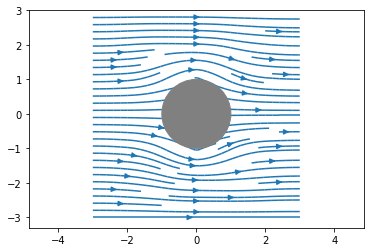

In [291]:
#define vector of velocities
v = np.empty((l+1,l+1),dtype = 'complex_')
#fill grid with a 'guess' initial value
v.fill(0.5+0.5j)

#set boundary conditions
v[(l):, :] = 1+0j #top
v[:1, :] = 1+0j #bottom
v[:, (l):] = 1+0j #right
v[:, :1] = 1+0j #left

v[l//2-1,l//2] = 0+0j #(-1,0)
v[l//2,l//2-1] = 2+0j #(0,-1)
v[l//2,l//2+1] = 2+0j #(0,1)
v[l//2+1,l//2] = 0+0j #(1,0)
v[l//2-1,l//2-1] = 1+0.5j #(-1,-1)
v[l//2+1,l//2+1] = 1+0.5j #(1,1)
v[l//2-1,l//2+1] = 1-0.5j #(-1,1)
v[l//2+1,l//2-1] = 1-0.5j #(1,-1)

for i in range(0, 1000):
    for j in range(1, l//2-1):
        for k in range(1, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8            
for i in range(0, 1000):
    for j in range(l//2+2, l):
        for k in range(1, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8           
for i in range(0, 1000):
    for j in range(1, l):
        for k in range(1, l//2-1):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8           
for i in range(0, 1000):
    for j in range(1, l):
        for k in range(l//2+2, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8
            
plt.streamplot(x_mesh,y_mesh,v.real,(-1)*v.imag, linewidth=1.5)
circle1 = plt.Circle((0,0),1,color = 'grey',zorder=2) #make a circle
plt.gca().add_patch(circle1)
plt.axis('equal')

We can now do a very similar thing, instead for the case of the cylinder rotating.

(-3.0, 3.0, -3.0, 3.0)

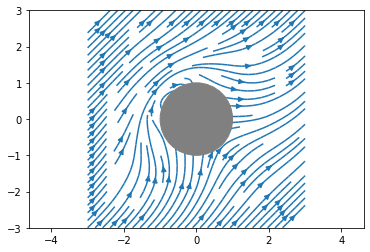

In [292]:
alpha=math.pi/4 #set angle of incoming flow

v = np.empty((l+1,l+1),dtype = 'complex_')
#fill grid with a 'guess' initial value
v.fill(0.5+0.5j)

#set boundary conditions
v[(l):, :] = 0.7079027323028495-0.7071062063459499j #top
v[:1, :] = 0.7079027323028495-0.7071062063459499j #bottom
v[:, (l):] = 0.7079027323028495-0.7071062063459499j #right
v[:, :1] = 0.7079027323028495-0.7071062063459499j #left

v[l//2-1,l//2] = cylinder_deriv_w(-1,0,-10) #(-1,0)
v[l//2,l//2-1] = cylinder_deriv_w(0,-1,-10) #(0,-1)
v[l//2,l//2+1] = cylinder_deriv_w(0,1,-10) #(0,1)
v[l//2+1,l//2] = cylinder_deriv_w(1,0,-10) #(1,0)
v[l//2-1,l//2-1] = cylinder_deriv_w(-1,-1,-10) #(-1,-1)
v[l//2+1,l//2+1] = cylinder_deriv_w(1,1,-10) #(1,1)
v[l//2-1,l//2+1] = cylinder_deriv_w(-1,1,-10) #(-1,1)
v[l//2+1,l//2-1] = cylinder_deriv_w(1,-1,-10) #(1,-1)

for i in range(0, 1000):
    for j in range(1, l//2-1):
        for k in range(1, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8            
for i in range(0, 1000):
    for j in range(l//2+2, l):
        for k in range(1, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8           
for i in range(0, 1000):
    for j in range(1, l):
        for k in range(1, l//2-1):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8           
for i in range(0, 1000):
    for j in range(1, l):
        for k in range(l//2+2, l):
            v[j, k] = (v[j-1][k] + v[j+1][k] + v[j][k-1] + v[j][k+1]
                         +v[j-1][k-1]+v[j-1][k+1]+v[j+1][k-1]+v[j+1][k+1])/8
            
plt.streamplot(x_mesh,y_mesh,v.real,(-1)*v.imag, linewidth=1.5)
circle1 = plt.Circle((0,0),1,color = 'grey',zorder=2)
plt.gca().add_patch(circle1)
plt.axis('equal')

We can compare these discrete plots to the same system done purely with the analytical solution. In the following plots, we also add a contour background showing the magnitude of the velocity at various points in our region.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


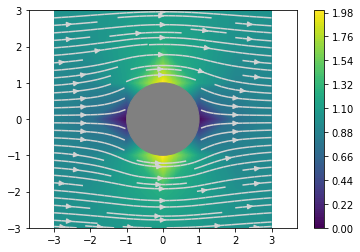

In [293]:
alpha=0
plt.streamplot(x_mesh,y_mesh,cylinder_deriv_w(x_mesh,y_mesh,0).real,(-1)*cylinder_deriv_w(x_mesh,y_mesh,0).imag, linewidth=1.5, color='lightgrey')
circle1 = plt.Circle((0,0),1,color = 'grey')
plt.gca().add_patch(circle1)
plt.axis('equal')
plt.contourf(x_mesh, y_mesh, np.sqrt(cylinder_deriv_w(x_mesh,y_mesh,0).real**2+cylinder_deriv_w(x_mesh,y_mesh,0).imag**2), 100)
plt.colorbar()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


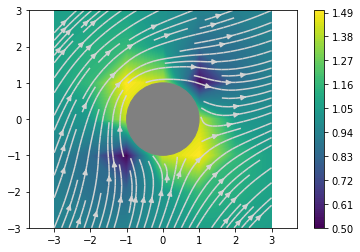

In [294]:
alpha=math.pi/4
plt.streamplot(x_mesh,y_mesh,cylinder_deriv_w(x_mesh,y_mesh,-10).real,(-1)*cylinder_deriv_w(x_mesh,y_mesh,-10).imag, linewidth=1.5, color='lightgrey')
circle1 = plt.Circle((0,0),1,color = 'grey')
plt.gca().add_patch(circle1)
plt.axis('equal')
plt.contourf(x_mesh, y_mesh, np.sqrt(cylinder_deriv_w(x_mesh,y_mesh,0).real**2+cylinder_deriv_w(x_mesh,y_mesh,0).imag**2), 100)
plt.colorbar()